No existe


In [2]:
from tabulate import tabulate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sci
from matricesAleatorias import matham as mh
from matricesAleatorias import estadisticos as est

In [2]:
def Estadisticas(pdf,datos,limite_inferior):
    def CDF(x):
        resultado,_=sci.integrate.quad(pdf,limite_inferior,x)
        return resultado
    CDF = np.vectorize(CDF)
    statistic, pvalue = sci.stats.kstest(datos,CDF)
    print(f"El estadistico corresponde a: {statistic}")
    print(f"El p-value es de:{pvalue}")
    momentos = ["Media", "Varianza","Asimetria","Kurtosis"]
    descripcion = sci.stats.describe(datos)
    print(descripcion)
    for i in range(4):
        print(f"La {momentos[i]} es de:{descripcion[i+2]}")

In [24]:
poisson = np.random.poisson(size=30000)
poissonfunc = sci.stats.poisson(1)

In [25]:
print(poissonfunc.stats(moments='mvsk'))
print(sci.stats.describe(poisson))
pd.Series(poisson).std()

(np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0))
DescribeResult(nobs=30000, minmax=(np.int64(0), np.int64(7)), mean=np.float64(1.0095333333333334), variance=np.float64(1.024076584775048), skewness=np.float64(0.9990015007589653), kurtosis=np.float64(0.947595956988013))


1.0119666915345094

In [29]:
#Estadisticas(poissonfunc.pmf, poisson,0)

In [30]:
med = est.Medidas_Estadisticas(Evals)

In [31]:
med.Resumen_Resultados()

| Medida    |          Valor |
|-----------|----------------|
| Media     |   -0.00863295  |
| Varianza  | 4999.81        |
| Asimetria |   -9.80982e-05 |
| Kurtosis  |   -1.00016     |


Este primer caso es para una unica matriz muy grande

In [3]:
n = 10000
H = mh.MatrizHamiltoniana(n) #Se crea el objeto Hamiltoniana
densidad = mh.DensidadesHam(n,1) #Se crea el objeto de las densidades

In [4]:
HGOE = pd.read_csv("~/Desktop/Graficos Reporte/EvalsGOE.dat")#H.GOE() #Se construye la matriz hamiltoniana GOE de n*n

In [5]:
Evals = np.array(HGOE["GOEEvalsEns"])#np.linalg.eigvalsh(HGOE) #Se calculan los egenvalores ordenados
EvalsNorm = Evals / np.sqrt(n) #Se normalizan los eigenvalores

In [10]:
#Se extrae un porcentaje de los eigenvalores

m = int(n/6)
EvalsLin = Evals[m:-m]
EvalsLinNorm = EvalsNorm[m:-m]

In [11]:
#Construcción de los dominios de los eigenvalores lineales
Dom = np.linspace(m,EvalsLin.size+m,EvalsLin.size)
DomNorm = np.linspace(m,EvalsLinNorm.size+m,EvalsLinNorm.size)

In [12]:
#Se calculan los espaciamientos no normalizados
Espaciamientos = np.diff(EvalsLin)
delta = Espaciamientos.mean()
S = Espaciamientos / delta

In [13]:
#Se calculan los espaciamientos normalizados
EspaciamientosNorm = np.diff(EvalsLinNorm)
deltaNorm = EspaciamientosNorm.mean()
SNorm = EspaciamientosNorm / deltaNorm

In [14]:
r = (Evals[1:-1] - Evals[2:]) / (Evals[:-2] - Evals[1:-1])
rNorm = (EvalsNorm[1:-1] - EvalsNorm[2:]) / (EvalsNorm[:-2] - EvalsNorm[1:-1])

In [11]:
Porcentaje = 100 - 200*m/n
Porcentaje

66.68

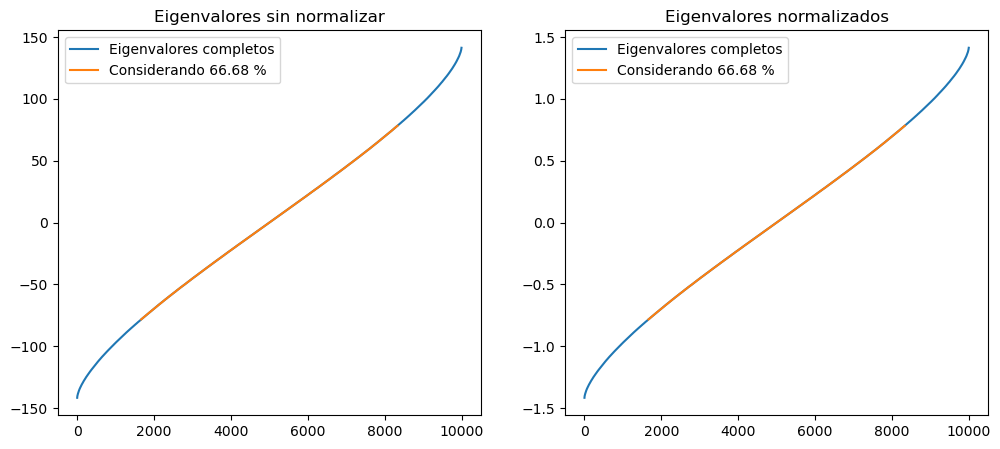

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(Evals,label='Eigenvalores completos')
ax[0].plot(Dom,EvalsLin,label=f'Considerando {Porcentaje} %')
ax[0].set_title('Eigenvalores sin normalizar')
ax[0].legend()

ax[1].plot(EvalsNorm,label='Eigenvalores completos')
ax[1].plot(DomNorm,EvalsLinNorm,label=f'Considerando {Porcentaje} %')
ax[1].set_title('Eigenvalores normalizados')
ax[1].legend()



## Ley del semi-circulo de Wigner

In [21]:
x = np.linspace(Evals.min(),Evals.max(),n)
xnorm = np.linspace(-1.6,1.6,n)

In [22]:
plam = densidad.Plam(x)
plamNorm = densidad.SemiCicle(xnorm)

In [23]:
histEign,bin = np.histogram(EvalsNorm,bins=30)

In [24]:
histEignNorm = histEign/n

In [25]:
bin_centers = (bin[:-1] + bin[1:]) / 2

" ax[1].bar(bin_centers, histEign, width=bin[1]-bin[0], \n        alpha=0.7, color='blue', edgecolor='white', label='Normalizados')\n "

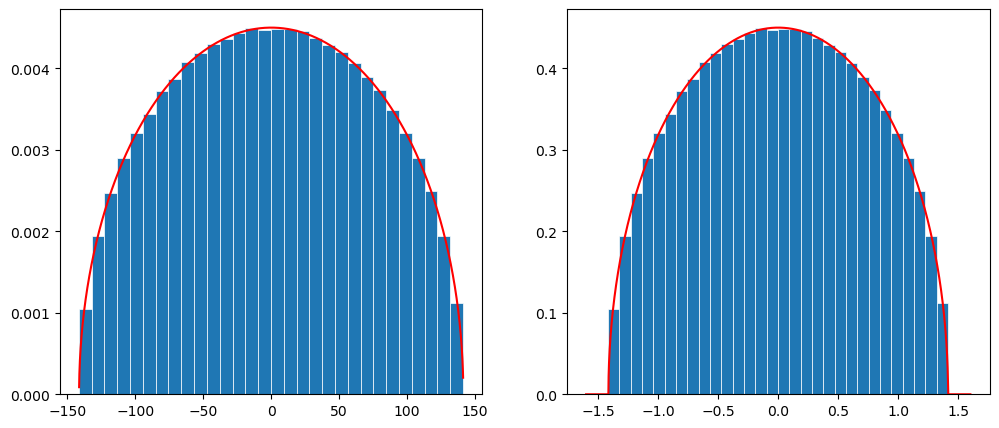

In [26]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(x,plam,c='r')
ax[0].hist(Evals,bins=30,density=True,linewidth=0.5, edgecolor="white")

ax[1].plot(xnorm,plamNorm,c='r')
ax[1].hist(EvalsNorm,bins=30,density=True,linewidth=0.5,edgecolor='white')
""" ax[1].bar(bin_centers, histEign, width=bin[1]-bin[0], 
        alpha=0.7, color='blue', edgecolor='white', label='Normalizados')
 """

## Espaciamientos

In [27]:
x = np.linspace(0,5,100)
ps = densidad.Ps(x)
psNorm = densidad.Ps(x)

Text(0.5, 0, 'S')

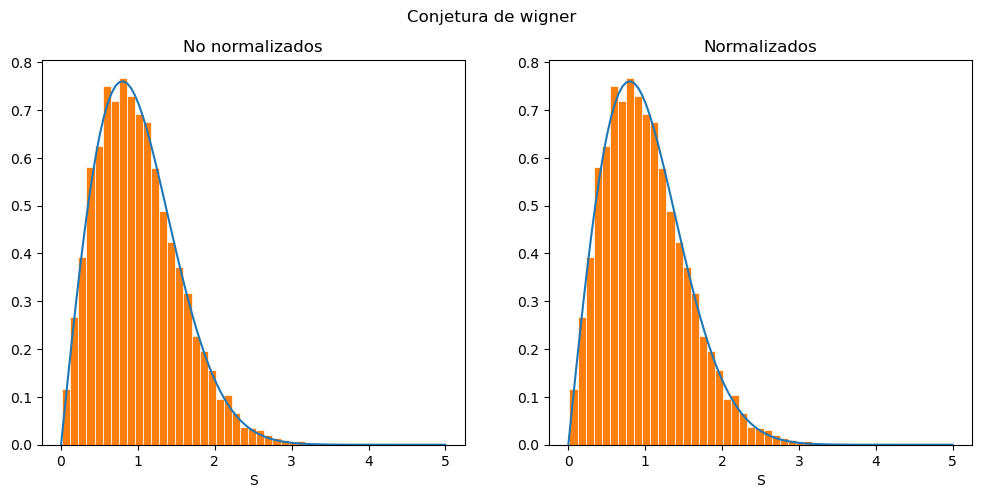

In [28]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle('Conjetura de wigner')

ax[0].plot(x,ps)
ax[0].hist(S,bins=30,density=True,linewidth=0.5, edgecolor="white")
ax[0].set_title('No normalizados')
ax[0].set_xlabel('S')

ax[1].plot(x,psNorm)
ax[1].hist(SNorm,bins=30,density=True,linewidth=0.5, edgecolor="white")
ax[1].set_title('Normalizados')
ax[1].set_xlabel('S')

## Distribución de r's

In [64]:
x = np.linspace(0,10000,100000)

In [65]:
pr = densidad.Pr(x)

(0.0, 8.0)

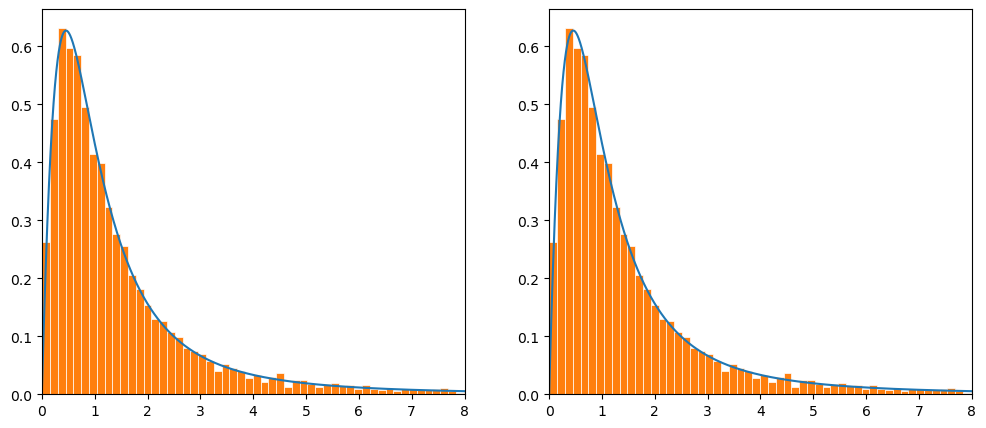

In [55]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(x,pr)
ax[0].hist(r,bins=1000,density=True,linewidth=0.5, edgecolor="white")
ax[0].set_xlim(0,8)

ax[1].plot(x,pr)
ax[1].hist(rNorm,bins=1000,density=True,linewidth=0.5, edgecolor="white")
ax[1].set_xlim(0,8)

In [32]:
def CDFPr(x):
    resultado,_=sci.integrate.quad(densidad.Pr,0,x)
    return resltado
CDFPr = np.vectorize(CDFPr)

In [52]:
sci.stats.kurtosis(r)

np.float64(403.94484371639544)

In [66]:
Estadisticas(densidad.Pr,pr,0)

El estadistico corresponde a: 0.9992139373243589
El p-value es de:0.0
DescribeResult(nobs=100000, minmax=(np.float64(0.0), np.float64(0.6247978194829737)), mean=np.float64(9.971757532396533e-05), variance=np.float64(3.636401474484892e-05), skewness=np.float64(80.4477243358335), kurtosis=np.float64(7062.971845071101))
La Media es de:9.971757532396533e-05
La Desviación estandar es de:3.636401474484892e-05
La Asimetria es de:80.4477243358335
La Kurtosis es de:7062.971845071101


In [57]:
Estadisticas(densidad.Pr,r,0)

El estadistico corresponde a: 0.006272822179599125
El p-value es de:0.8238992074115284
DescribeResult(nobs=9998, minmax=(np.float64(0.005099947929606712), np.float64(147.69748516898295)), mean=np.float64(1.800981992065253), variance=np.float64(14.969226767230824), skewness=np.float64(15.975113333686165), kurtosis=np.float64(403.94484371639544))
La Media es de:1.800981992065253
La Desviación estandar es de:14.969226767230824
La Asimetria es de:15.975113333686165
La Kurtosis es de:403.94484371639544


# Ensambles

In [31]:
n = 100
nsamp = 100000

In [32]:
H = mh.MatrizHamiltoniana(n)
Eval = []

In [33]:
densidad = mh.DensidadesHam(nsamp,1)

In [34]:
for i in range(nsamp):
    HGOE = H.GOE()
    eval = np.linalg.eigvalsh(HGOE)
    eval = eval / np.sqrt(n)
    Eval.append(eval)

In [35]:
Eval = np.concatenate(Eval)

In [36]:
#np.savetxt('EnsambleGOE.dat',Eval)

In [37]:
Eval.shape

(10000000,)

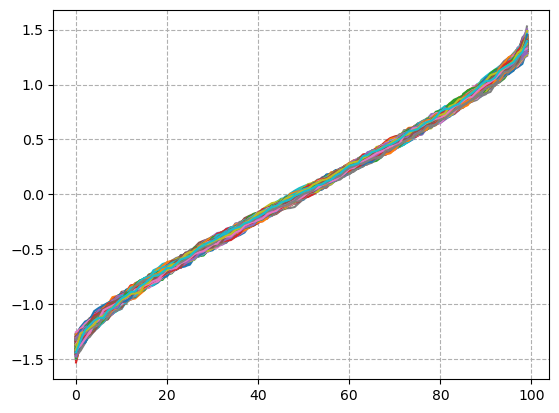

In [38]:
plt.figure()

for i in range(int(nsamp/n)):
    plt.plot(Eval[0+i*100:100 + i*100])

plt.grid(True,linestyle='--')
plt.show()

In [44]:
xlam = np.linspace(-1.5,1.5,1000)
plam = densidad.SemiCicle(xlam)

In [45]:
hisEns, binEns = np.histogram(Eval,bins=30)

In [46]:
hisEnsNorm = hisEns/Eval.size

In [47]:
bin_centers = (binEns[:-1] + binEns[1:]) / 2

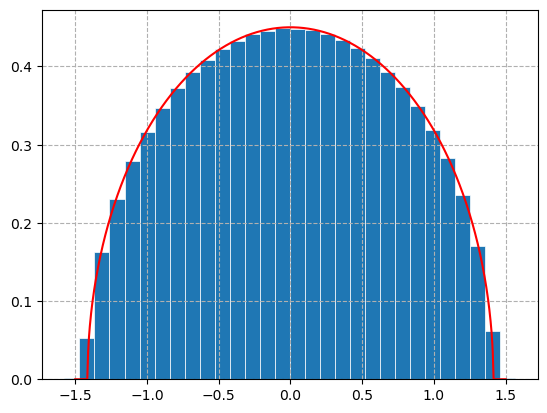

In [50]:
plt.figure()

plt.grid(True,linestyle='--')
plt.hist(Eval,bins=30,density=True,linewidth=0.5, edgecolor="white")
""" plt.bar(bin_centers, hisEns, width=bin[1]-bin[0], 
       alpha=0.7, color='blue', edgecolor='white', label='Normalizados')
 """
plt.plot(xlam,plam,c='r')


plt.show()


### Distribución r's para un ensamble

In [51]:
r = []

In [52]:
for i in range(int(nsamp/n)):
    EvalSamp = Eval[0+i*100:100 + i*100]
    rsamp = (EvalSamp[1:-1] - EvalSamp[2:]) / (EvalSamp[:-2] - EvalSamp[1:-1])
    r.append(rsamp)

In [53]:
r = np.concatenate(r)

In [54]:
xr = np.linspace(0,10,1000)
pr = densidad.Pr(xr)

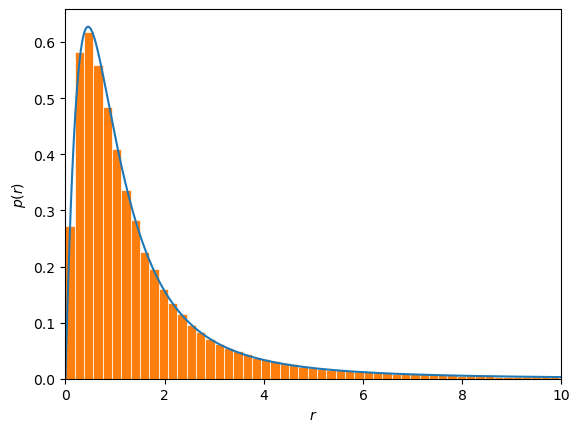

In [62]:
plt.figure()

plt.plot(xr,pr)
plt.hist(r,bins=5000,density=True,linewidth=0.5, edgecolor="white")
plt.xlabel(r'$ r $')
plt.ylabel(r'$ p(r) $')
plt.xlim(0,10)

plt.show()

### $P(s)$

In [56]:
m = int(n/6)
Porcentaje = 100 - 200*m/n
Porcentaje

68.0

In [57]:
S = []

In [58]:
for i in range(int(nsamp/n)):
    EvalSamp = Eval[0+i*100:100 + i*100]
    EvalSampLin = EvalSamp[m:-m]
    EspaSamp = np.diff(EvalSampLin)
    deltaSamp = EspaSamp.mean()
    Ssamp = EspaSamp / deltaSamp
    S.append(Ssamp)

In [59]:
S = np.concatenate(S)

In [60]:
xs = np.linspace(0,5,1000)
ps = densidad.Ps(xs)

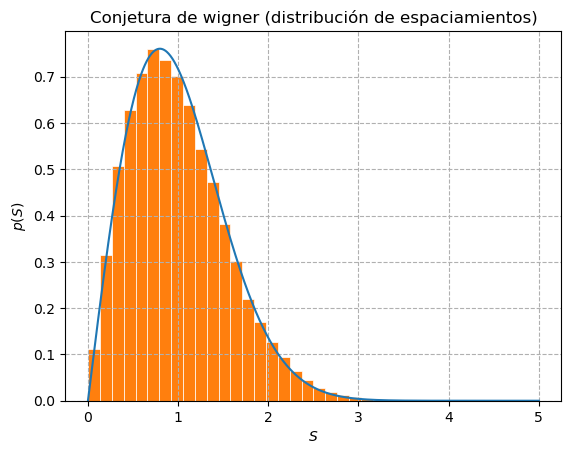

In [61]:
plt.figure()

plt.plot(xs,ps)
plt.hist(S,bins=30,density=True,linewidth=0.5, edgecolor="white")
plt.grid(True,linestyle='--')
plt.xlabel(r'$ S $')
plt.ylabel(r'$ p(S) $')
plt.title('Conjetura de wigner (distribución de espaciamientos)')

plt.show()